In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f=h5py.File(r'features_db_test2.h5', 'r')
print(list(f.keys()))
x = f['x'][:,:,:]
y = f['y']
print('(samples, timesteps, features) (samples,label)-> ', x.shape, y.shape)

['x', 'y']
(samples, timesteps, features) (samples,label)->  (26, 127, 7) (26, 1)


In [3]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2_x)
scaled_data = scaler.transform(d2_x)

In [5]:
scaled_data

array([[-0.7748531 , -0.59336901, -0.56461661, ...,  0.11605285,
        -1.03232044,  0.16619385],
       [-1.47623321,  1.74714384, -0.26142155, ..., -2.02504325,
        -1.03757513,  0.17922123],
       [-0.68220187,  1.03983698, -1.37098329, ..., -0.10403847,
        -0.34287008, -1.85556473],
       ...,
       [ 0.49368627, -0.67516007, -0.71896647, ..., -0.5706464 ,
         0.69551665, -0.57638395],
       [ 1.06535692, -0.74849501, -1.08032358, ...,  0.7339762 ,
         1.70379596,  2.33031393],
       [ 1.06535692, -0.74849501, -1.08032358, ...,  0.7339762 ,
         1.70379596,  2.33031393]])

In [6]:
scaled_data[:] = np.nan_to_num(scaled_data)
scaled_data

array([[-0.7748531 , -0.59336901, -0.56461661, ...,  0.11605285,
        -1.03232044,  0.16619385],
       [-1.47623321,  1.74714384, -0.26142155, ..., -2.02504325,
        -1.03757513,  0.17922123],
       [-0.68220187,  1.03983698, -1.37098329, ..., -0.10403847,
        -0.34287008, -1.85556473],
       ...,
       [ 0.49368627, -0.67516007, -0.71896647, ..., -0.5706464 ,
         0.69551665, -0.57638395],
       [ 1.06535692, -0.74849501, -1.08032358, ...,  0.7339762 ,
         1.70379596,  2.33031393],
       [ 1.06535692, -0.74849501, -1.08032358, ...,  0.7339762 ,
         1.70379596,  2.33031393]])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26) # liczba głównych składowych
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_new = pca.inverse_transform(x_pca)
print("original shape:   ", scaled_data.shape)
print("transformed shape:", x_pca.shape)

original shape:    (26, 889)
transformed shape: (26, 26)


Text(0, 0.5, 'Second Principal Component')

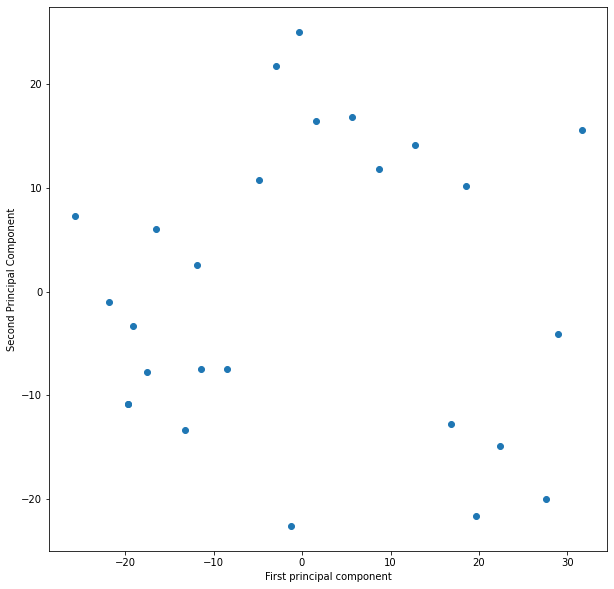

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [9]:
pca.components_

array([[-0.04188311,  0.0277799 , -0.01707885, ..., -0.02138968,
        -0.04850778, -0.01544908],
       [-0.00302822,  0.01640283,  0.04826555, ...,  0.02122738,
        -0.03385308, -0.00264557],
       [ 0.00909062,  0.00702771,  0.0371317 , ..., -0.05554269,
        -0.00549817, -0.02432319],
       ...,
       [ 0.04319046,  0.00314377,  0.00339353, ...,  0.03626275,
        -0.02356282, -0.01099713],
       [-0.21111458, -0.33848035,  0.02120484, ..., -0.00962051,
         0.01280226, -0.00460962],
       [ 0.01619407, -0.0373525 ,  0.01631032, ..., -0.0058089 ,
         0.00444406, -0.00183268]])

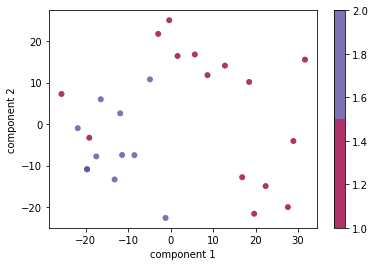

In [21]:
digits = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2] #1-pliki chorej osoby, 2- pliki zdrowej osoby

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=digits, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap("Spectral", 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

<li>Podział na chorych(czerwony) i zdrowych(fioletowy). Klasyfikator rozróżnił dwie oczekiwane klasy. Nie są one idealnie widoczne, lecz po naniesienu kolorów widać skupiska elementó danej klasy.
<li>Problem w dokładniejszych wysunięciu wniosków spowodowany jest przygotowaniem za małej bazy danych, która nie pozwala nam na dokładniejszą analizę.


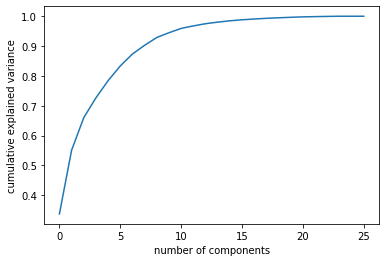

In [16]:
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');